In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

Reading and describing data

In [48]:
data = pd.read_csv('creditcardmarketing1.csv')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [50]:
data.describe(include = 'all')

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000,18000,18000,18000,18000.000000,18000,18000,18000.000000,18000.000000,18000.000000,18000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
unique,NaN,2,3,2,3,NaN,2,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Air Miles,Postcard,Medium,NaN,No,High,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,16977,6061,9147,9013,NaN,15322,6071,NaN,NaN,NaN,11655,NaN,NaN,NaN,NaN,NaN
mean,9000.500000,NaN,NaN,NaN,NaN,1.255778,NaN,NaN,1.903500,1.203444,3.499056,NaN,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,NaN,NaN,NaN,NaN,0.472501,NaN,NaN,0.797009,0.427341,1.114182,NaN,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,3.000000,NaN,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,3.000000,NaN,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,4.000000,NaN,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000


In [51]:
for i in data.columns:
    print (i,";",len(data[i].unique()),":",data[i].unique())

Customer Number ; 18000 : [    1     2     3 ... 17998 17999 18000]
Offer Accepted ; 2 : ['No' 'Yes']
Reward ; 3 : ['Air Miles' 'Cash Back' 'Points']
Mailer Type ; 2 : ['Letter' 'Postcard']
Income Level ; 3 : ['High' 'Medium' 'Low']
# Bank Accounts Open ; 3 : [1 2 3]
Overdraft Protection ; 2 : ['No' 'Yes']
Credit Rating ; 3 : ['High' 'Medium' 'Low']
# Credit Cards Held ; 4 : [2 1 3 4]
# Homes Owned ; 3 : [1 2 3]
Household Size ; 8 : [4 5 2 6 3 1 8 9]
Own Your Home ; 2 : ['No' 'Yes']
Average Balance ; 4729 : [1160.75  147.25  276.5  ...  691.   1649.   1427.25]
Q1 Balance ; 2159 : [1669.   39.  367. ... 1122. 2139. 1070.]
Q2 Balance ; 1946 : [ 877.  106.  352. ...   91. 1865. 1824.]
Q3 Balance ; 2282 : [1095.   78.  145. ... 2265. 2045. 1037.]
Q4 Balance ; 2185 : [1002.  366.  242. ... 1946. 2035. 2188.]


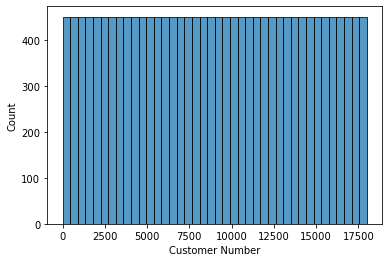

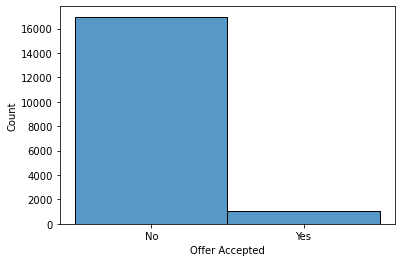

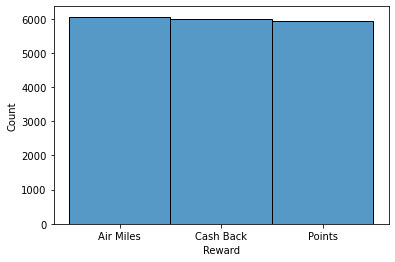

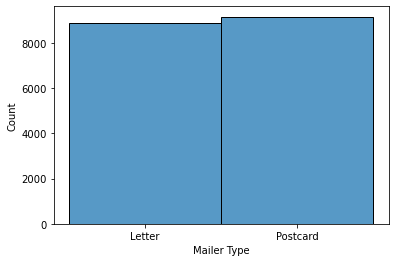

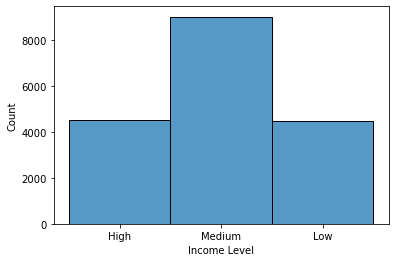

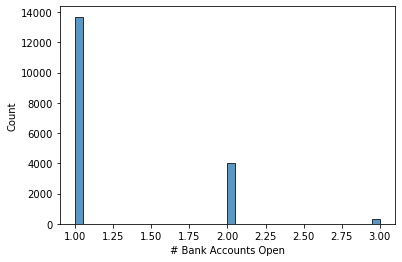

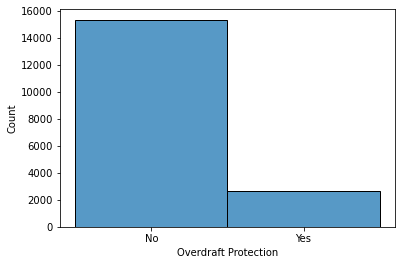

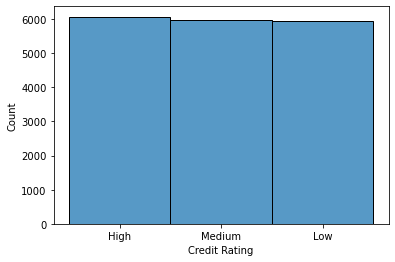

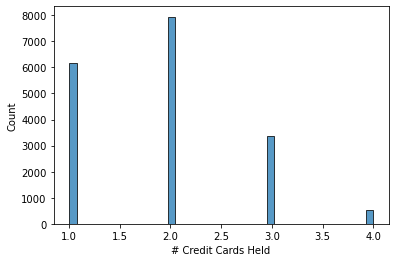

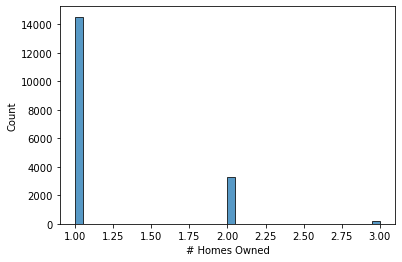

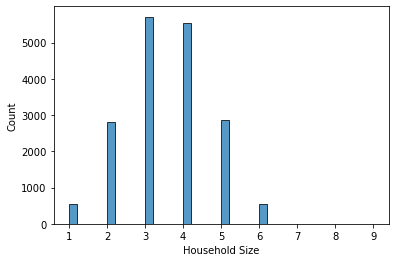

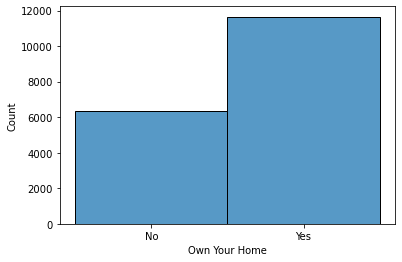

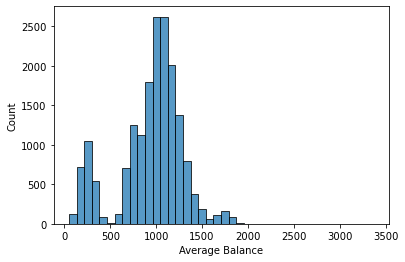

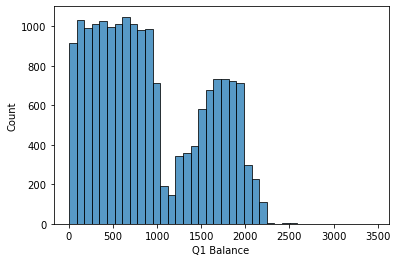

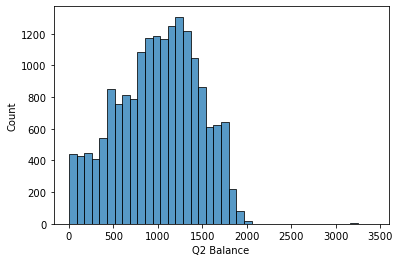

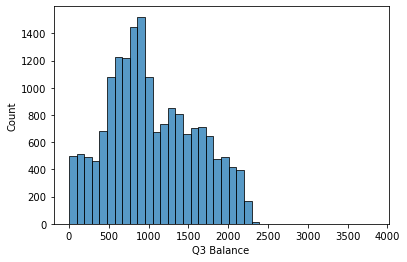

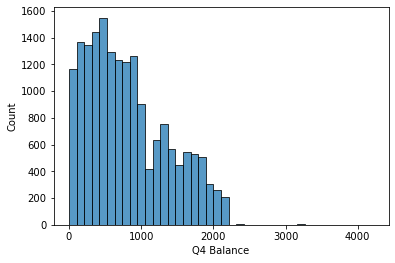

In [52]:
for i in range(data.shape[1]):
    sns.histplot(data[data.columns[i]], bins=40)
    plt.show()

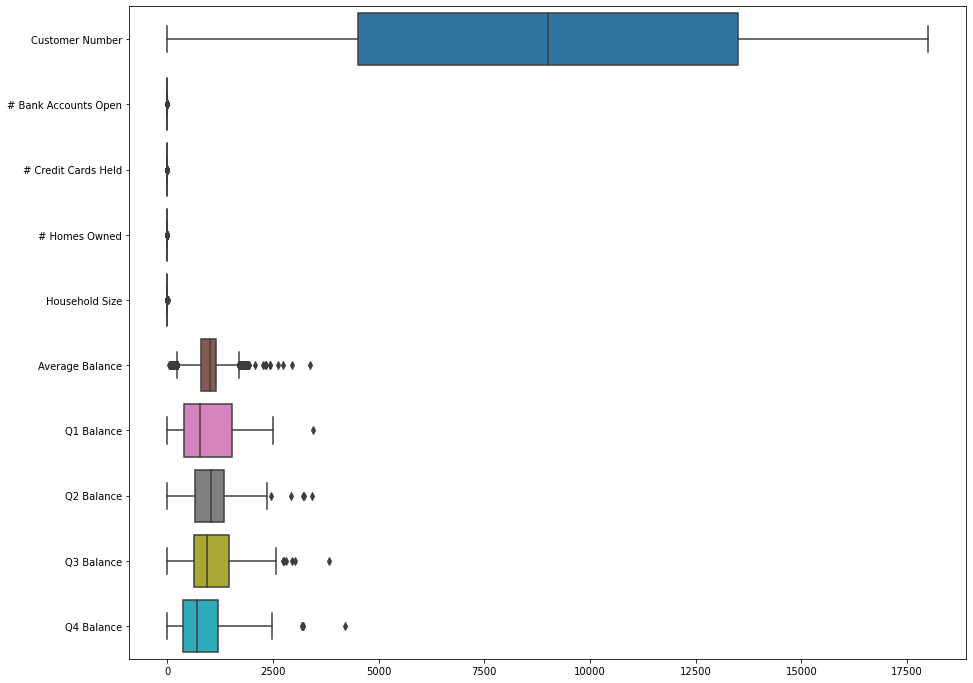

In [53]:
# Draw a boxplot for each numeric variable in a DataFrame:
plt.figure(figsize=(15,12))
ax = sns.boxplot(data=data.select_dtypes(include=[np.number]), orient="h")

#### Cleaning column headers


In [54]:
def clean_columns(x):
    if x[0] == '#':
        x = x[2:].lower().strip().replace(' ', '_')
    else:
        x = x.lower().strip().replace(' ', '_')
    return x

data.columns = list(map(clean_columns, data.columns))
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_your_home', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance'],
      dtype='object')

#### Dealing with null values

In [55]:
data.isnull().sum()/data.shape[0]*100

customer_number         0.000000
offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

#### Numerical / categorical columns split

In [56]:
data = data.drop(['customer_number'], axis = 1)

In [57]:
cat_columns = []
num_columns = []

for i in data.columns:
    if len(data[i].unique()) > 10:
        num_columns.append(i)
    else:
        cat_columns.append(i)   

In [58]:
num = data[num_columns]
num.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [59]:
for i in num.columns:
    print(i, ":", num[i].describe())

average_balance : count    17976.000000
mean       940.515562
std        350.297837
min         48.250000
25%        787.500000
50%       1007.000000
75%       1153.250000
max       3366.250000
Name: average_balance, dtype: float64
q1_balance : count    17976.000000
mean       910.450656
std        620.077060
min          0.000000
25%        392.750000
50%        772.000000
75%       1521.000000
max       3450.000000
Name: q1_balance, dtype: float64
q2_balance : count    17976.000000
mean       999.392190
std        457.402268
min          0.000000
25%        663.000000
50%       1032.000000
75%       1342.000000
max       3421.000000
Name: q2_balance, dtype: float64
q3_balance : count    17976.000000
mean      1042.033600
std        553.452599
min          0.000000
25%        633.000000
50%        945.500000
75%       1463.000000
max       3823.000000
Name: q3_balance, dtype: float64
q4_balance : count    17976.000000
mean       810.185803
std        559.001365
min          0.000000
2

In [60]:
for i in num.columns:
    med = num[i].median()
    num[i] = num[i].fillna(med)

#### Checking Multicollinearity

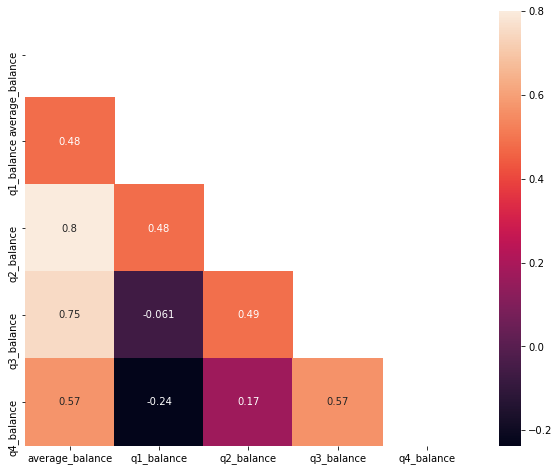

In [61]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix) #masking because it's symmetrical
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [62]:
vif = {}
numer_vif = num
numer_vif= add_constant(num)

In [63]:
for i in np.arange(numer_vif.shape[1]):
    column_name = numer_vif.columns[i]
    value = variance_inflation_factor(np.array(numer_vif), i)
    vif[column_name] = value
vif    

{'const': 8.268845743264174,
 'average_balance': 4447.523660455172,
 'q1_balance': 871.3913136229564,
 'q2_balance': 476.80592208638893,
 'q3_balance': 695.2171601202452,
 'q4_balance': 709.0042955328568}

In [64]:
num.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [65]:
def minmax_func(df):
    max_q = df.idxmax(axis=1)
    min_q = df.idxmin(axis=1)
    range_ = (df.max(axis=1))-(df.min(axis=1))
    df["max_quarter"] = max_q
    df["min_quarter"] = min_q
    df["range"] = range_
    return df
   
num = minmax_func(num)

In [66]:
num['max_quarter'] = list(map(lambda x: x[:2],num['max_quarter']))
num['min_quarter'] = list(map(lambda x: x[:2],num['min_quarter']))

In [67]:
#data_crosstab = pd.crosstab(num['max_quarter'], num['min_quarter'], margins = False) 
#data_crosstab

#from scipy.stats import chi2_contingency
#g, p, dof, expctd = chi2_contingency(data_crosstab, correction=False)
#g, p, dof, expctd

In [68]:
num = num.drop(['q1_balance','q2_balance','q3_balance','q4_balance'], axis=1)

In [69]:
num.head()

,average_balance,max_quarter,min_quarter,range
0,1160.75,q1,q2,792.0
1,147.25,q4,q1,327.0
2,276.50,q1,q3,222.0
3,1219.00,q2,q4,1341.0
4,1211.00,q1,q4,1775.0


#### Categorical

In [70]:
cat = data[cat_columns]
cat["max_quarter"] = num["max_quarter"]
cat["min_quarter"] = num["min_quarter"]

In [71]:
cat.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,max_quarter,min_quarter
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,q1,q2
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,q4,q1
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,q1,q3
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,q2,q4
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,q1,q4


In [72]:
num = num.drop(["max_quarter", "min_quarter"], axis = 1)
num.head()

,average_balance,range
0,1160.75,792.0
1,147.25,327.0
2,276.50,222.0
3,1219.00,1341.0
4,1211.00,1775.0


**Feature engineering**
<br>
*Checking multicollinearity in categoriccal columns with chi2 test*

In [73]:
cat2 = cat.drop(['offer_accepted'], axis = 1)
cat2.shape
# dropping target variable
# cat2 = cat

(18000, 12)

In [74]:
cat2.head()

,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,max_quarter,min_quarter
0,Air Miles,Letter,High,1,No,High,2,1,4,No,q1,q2
1,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,q4,q1
2,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,q1,q3
3,Air Miles,Letter,Medium,2,No,High,1,1,4,No,q2,q4
4,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,q1,q4


In [75]:
lst1 = []
lst2 = []
lst3 = []

data_test = pd.DataFrame(cat2.columns)

data_test['sum'] = 0

for i,n in enumerate(cat2.columns):
    x = 1
    while x < len(cat2.columns)-i:
        crosstab = pd.crosstab(cat2[n],cat2[cat2.columns[i+x]])
        lst1.append(n)
        lst2.append(cat2.columns[i+x])
        lst3.append(chi2_contingency(crosstab, correction=False)[1])
        data_test.iloc[i,1] += chi2_contingency(crosstab, correction=False)[1]
        data_test.iloc[i+x,1] += chi2_contingency(crosstab, correction=False)[1]
        x += 1

df = pd.concat([pd.DataFrame(lst1),pd.DataFrame(lst2),pd.DataFrame(lst3)], axis =1)


In [76]:
df[df.iloc[:,2]<0.05]

,0,0,0
19,mailer_type,max_quarter,0.007761
49,credit_rating,max_quarter,0.008498
50,credit_rating,min_quarter,0.013072
54,credit_cards_held,max_quarter,0.009283
65,max_quarter,min_quarter,0.000000


In [77]:
data_test.head(15)

,0,sum
0,reward,5.803371
1,mailer_type,6.389539
2,income_level,6.164435
3,bank_accounts_open,5.320505
4,overdraft_protection,4.376775
5,credit_rating,4.944851
6,credit_cards_held,6.761340
7,homes_owned,7.067137
8,household_size,5.361124
9,own_your_home,5.108094


In [78]:
chi_score = 0
while chi_score < 0.05:
    min_score = min(df.iloc[:,2])
    col_1 = df[df.iloc[:,2] == min_score].iloc[0,0]
    col_2 = df[df.iloc[:,2] == min_score].iloc[0,1]
    if data_test[data_test.iloc[:,0]==col_1].iloc[0,1] >= data_test[data_test.iloc[:,0]==col_2].iloc[0,1]:
        del_col = col_2
    else:
        del_col = col_1
    df = df[df.iloc[:,0] != del_col]
    df = df[df.iloc[:,1] != del_col]
    chi_score = min(df.iloc[:,2])

In [79]:
df

,0,0,0
0,reward,mailer_type,0.638096
1,reward,income_level,0.627896
2,reward,bank_accounts_open,0.052374
3,reward,overdraft_protection,0.467375
4,reward,credit_rating,0.677843
5,reward,credit_cards_held,0.443031
6,reward,homes_owned,0.816238
7,reward,household_size,0.824041
8,reward,own_your_home,0.382907
11,mailer_type,income_level,0.579700


In [80]:
cat = cat.drop(["max_quarter", "min_quarter"], axis=1)
cat.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes


In [81]:
data_clean = pd.concat([cat, num], axis =1)

In [82]:
data_clean.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,range
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,792.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,327.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,222.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1341.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,1775.0


In [83]:
# sns.countplot(x=data_clean["credit_cards_held"], hue = data_clean["average_balance"], data=data_clean)

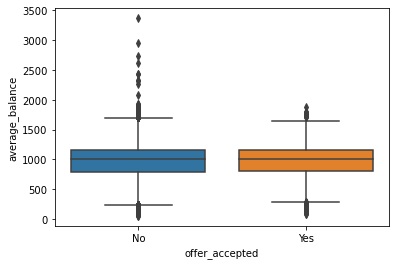

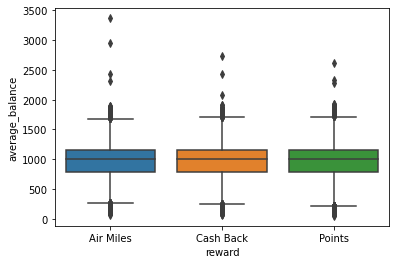

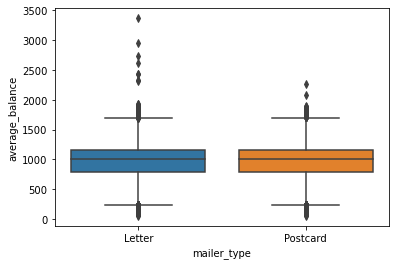

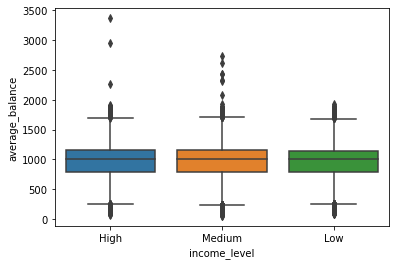

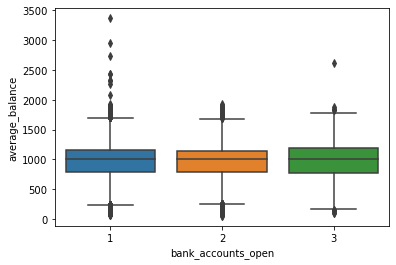

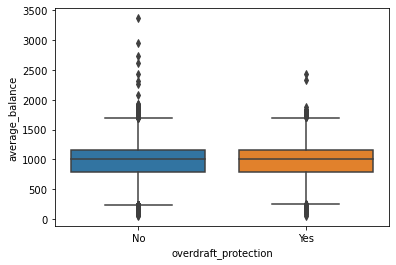

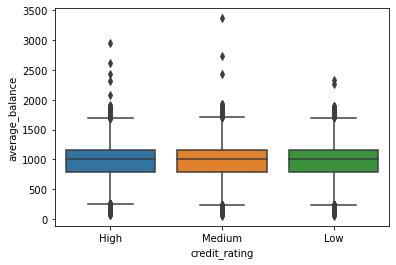

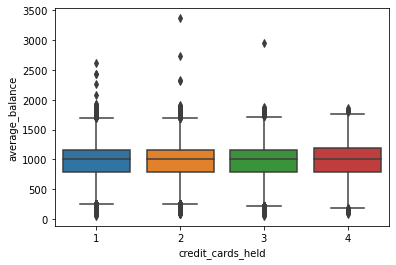

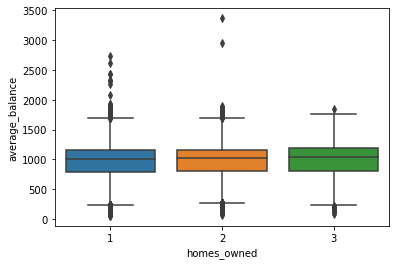

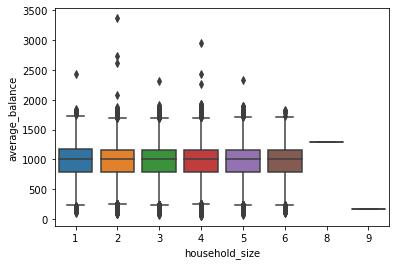

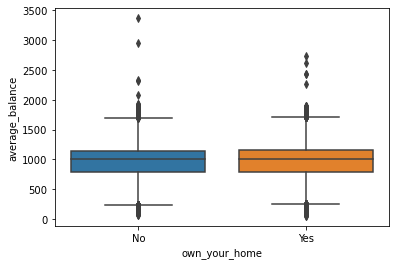

In [84]:
for i in cat:
    sns.boxplot(x=i, y="average_balance", data = data_clean)
    plt.show()

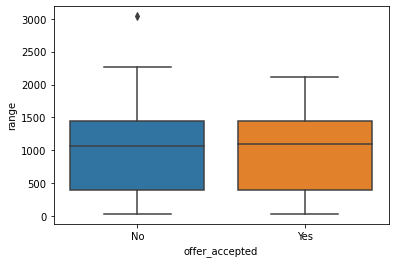

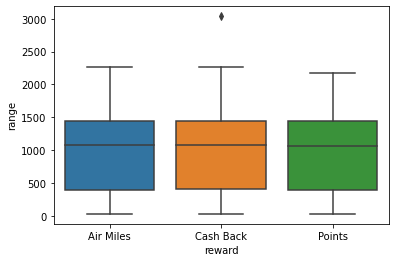

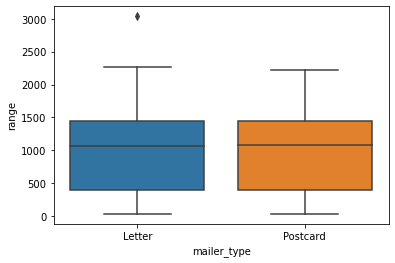

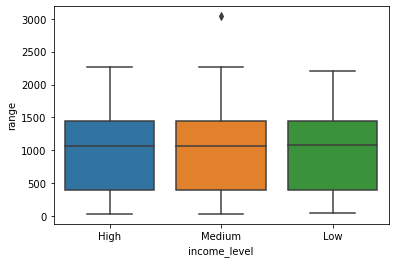

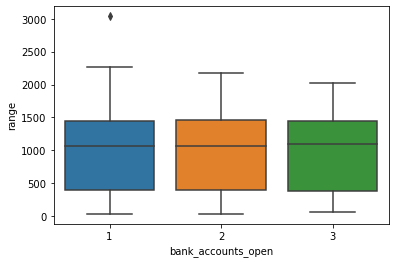

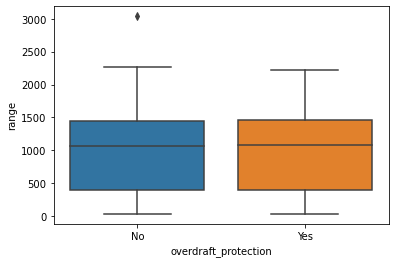

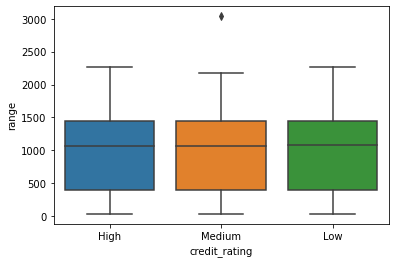

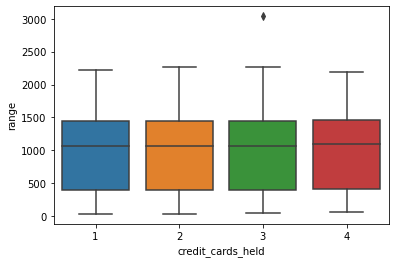

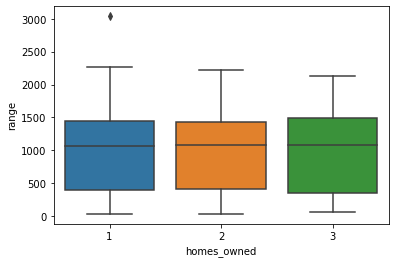

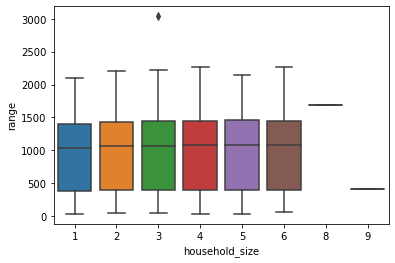

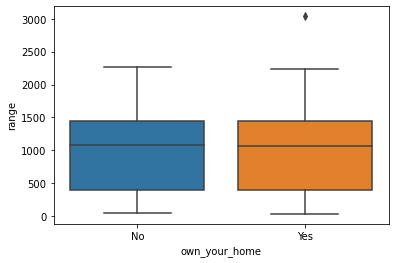

In [85]:
for i in cat:
    sns.boxplot(x=i, y="range", data = data_clean)
    plt.show()

Replacing low frequency values in household_size and clustering them under value=6

In [86]:
data_clean['household_size'] = data_clean['household_size'].apply(lambda x: 6 if x>6 else x)

# data_clean['credit_cards_held'] = data_clean['credit_cards_held'].apply(lambda x: x if x==3 else 3)

<AxesSubplot:xlabel='bank_accounts_open', ylabel='count'>

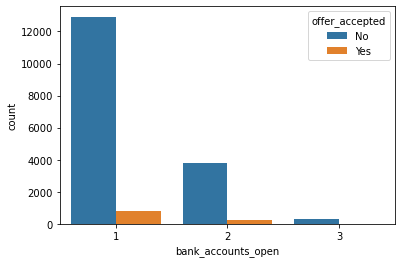

In [87]:
sns.countplot(x = 'bank_accounts_open', hue = 'offer_accepted', data = data_clean)

<AxesSubplot:xlabel='credit_cards_held', ylabel='count'>

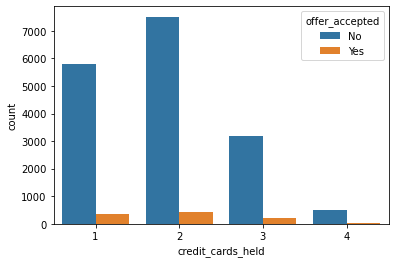

In [88]:
sns.countplot(x = 'credit_cards_held', hue = 'offer_accepted', data = data_clean)

In [89]:
# sns.set(style="whitegrid")
# plt.figure(figsize=(8,5))
# total = float(len(data_clean))
# ax = sns.countplot(x="credit_cards_held", hue="offer_accepted", data=data_clean)
# plt.title('xxx', fontsize=20)
# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width()
#     y = p.get_height()
#     ax.annotate(percentage, (x, y),ha='center')
# plt.show()

In [90]:
data_clean.to_csv('data_clean.csv', index=False)